In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
path = "C:/Users/himan/Downloads/cifar-10-python/cifar-10-batches-py"

In [5]:
os.listdir(path)

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

In [6]:
path1 = os.path.join(path,'data_batch_1')

In [7]:
data1 = unpickle(path1)

In [8]:
##data2
path1 = os.path.join(path,'data_batch_1')
data1 = unpickle(path1)
##data2
path2 = os.path.join(path,'data_batch_2')
data2 = unpickle(path2)
##data3
path3 = os.path.join(path,'data_batch_3')
data3 = unpickle(path3)
##data4
path4 = os.path.join(path,'data_batch_4')
data4 = unpickle(path4)
##data5
path5 = os.path.join(path,'data_batch_5')
data5 = unpickle(path5)



In [9]:
data5.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [10]:
data1[b'data'][0].shape

(3072,)

In [11]:
temp = data1[b'data']

In [12]:
temp =[]
temp.append(data1[b'data'])


In [13]:
df = pd.DataFrame(data1[b'data'])

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18,18,21,23,24,23,24,25,22,19,...,20,24,33,41,45,39,39,39,34,37
9996,235,240,249,253,254,253,254,254,179,108,...,75,89,113,139,163,174,179,182,181,181
9997,71,60,74,73,87,125,179,231,250,252,...,71,70,67,66,70,81,78,68,69,68
9998,250,254,211,64,61,60,55,54,55,59,...,134,134,132,130,127,132,133,215,255,254


In [15]:
temp = np.append(data1[b'data'],data2[b'data'],axis=0)

In [16]:
temp.shape

(20000, 3072)

In [17]:
X_train = np.append(data1[b'data'],data2[b'data'],axis=0)
X_train= np.append(X_train,data3[b'data'],axis=0)
X_train= np.append(X_train,data4[b'data'],axis=0)
X_train= np.append(X_train,data5[b'data'],axis=0)

In [18]:
X_train.shape

(50000, 3072)

In [19]:
X_train[30000:40000]

array([[178, 178, 178, ...,  80,  80,  77],
       [ 29,  22,  25, ...,  29,  31,  30],
       [ 36,  33,  21, ..., 173, 170, 170],
       ...,
       [167, 164, 151, ..., 132, 142, 130],
       [ 45,  46,  46, ...,  30,  34,  24],
       [235, 239, 239, ..., 182, 175, 174]], dtype=uint8)

In [20]:
data4[b'data']

array([[178, 178, 178, ...,  80,  80,  77],
       [ 29,  22,  25, ...,  29,  31,  30],
       [ 36,  33,  21, ..., 173, 170, 170],
       ...,
       [167, 164, 151, ..., 132, 142, 130],
       [ 45,  46,  46, ...,  30,  34,  24],
       [235, 239, 239, ..., 182, 175, 174]], dtype=uint8)

In [21]:
##target data
Y_train = np.append(data1[b'labels'],data2[b'labels'],axis=0)
Y_train = np.append(Y_train,data3[b'labels'],axis=0)
Y_train = np.append(Y_train,data4[b'labels'],axis=0)
Y_train = np.append(Y_train,data5[b'labels'],axis=0)

In [22]:
Y_train.shape

(50000,)

# Testing Data

In [23]:
##data5
path_test = os.path.join(path,'test_batch')
data_test = unpickle(path_test)

In [24]:
X_test = data_test[b'data']
Y_test = data_test[b'labels']

# Performing PCA


In [25]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train)


In [123]:
p =np.cumsum(pca.explained_variance_ratio_)

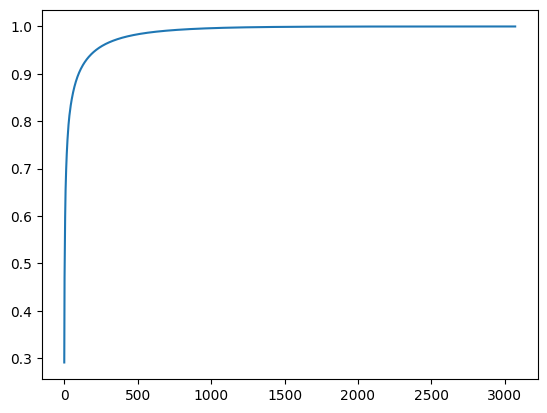

In [124]:
import matplotlib.pyplot as plt
plt.plot(p)

In [43]:
pca = PCA(n_components=150)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [36]:
x_train_pca.shape

(50000, 120)

# Model Training and Testing


In [37]:
from sklearn.svm import SVC

In [38]:
clf = SVC()

In [39]:
clf.fit(x_train_pca,Y_train)

SVC()

In [40]:
clf.score(x_test_pca,Y_test)

0.5377

In [46]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
grid ={'gamma':[100,1000],'C':[3,10]}
abc = RandomizedSearchCV(clf,grid)
abc.fit(x_train_pca,Y_train)
abc.best_params_

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
